### Import Libraries

In [2]:
## Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Text Processing
import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [4]:
# Tradional Learning Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Data Loading

In [6]:
# Load the dataset
emaill = pd.read_csv("emails.csv")
emaill.shape

(5726, 2)

In [8]:
# Show dataset sample (5 random records)
emaill.sample(5)

,text,spam
2884,"Subject: enron contact info dear vince , chri...",0
1921,Subject: a visit professor vincent kaminski ...,0
592,Subject: free lancer eventos free lancer even...,1
45,Subject: 1000 full color brochures 335 the ts...,1
367,Subject: feel insecure about your penis size ?...,1


In [10]:
# Show Dataset info
emaill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5726 non-null   object
 1   spam    5726 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [12]:
# Show dataset statistics
emaill.describe()

,spam
count,5726.000000
mean,0.238910
std,0.426455
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6584\4140072555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette=['green', 'red'])


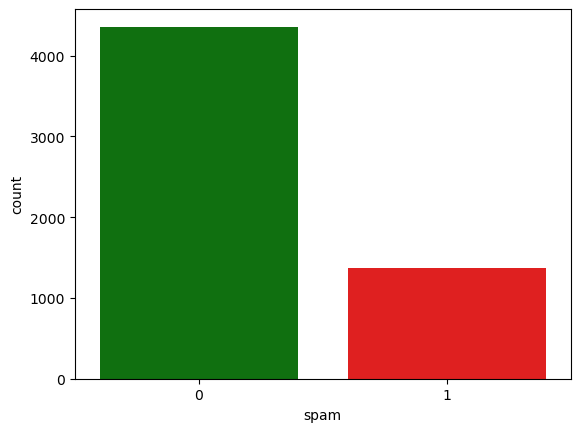

In [14]:
# Visualize spam  frequenices
counts = emaill['spam'].value_counts()
sns.barplot(x=counts.index, y=counts, palette=['green', 'red'])
plt.show()

### Data Cleaning

In [17]:
# Check for missing data for each column
emaill.isnull().sum()

text    0
spam    0
dtype: int64

In [19]:
# Check for duplicates
print(emaill.duplicated().sum())

33


In [21]:
# Remove the duplicates
emaill.drop_duplicates(inplace=True)

In [23]:
# Cleaning data for punctuation and stopwords and then tokenizing it into words(tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [25]:
# Fit the TfidfVectorizer to data
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(emaill['text'])

In [27]:
print(X_tfidf)

  (0, 32261)	0.015869077237502232
  (0, 23314)	0.10909323378445086
  (0, 18781)	0.12755136382412047
  (0, 36899)	0.17211702510478571
  (0, 10021)	0.06618523527153461
  (0, 17635)	0.08277868435943463
  (0, 21087)	0.10021264762237797
  (0, 18791)	0.065465115922263
  (0, 27928)	0.06073231281507161
  (0, 16609)	0.06982622809735332
  (0, 33682)	0.06942043029109944
  (0, 28052)	0.10138867275640004
  (0, 9259)	0.14926880633527487
  (0, 33336)	0.08882167409893697
  (0, 21601)	0.10315657516801603
  (0, 15369)	0.059773026206629186
  (0, 24203)	0.08175960483535999
  (0, 32525)	0.11011740056117715
  (0, 4822)	0.09752600462766482
  (0, 18178)	0.040161050040373784
  (0, 18827)	0.12009283992971354
  (0, 7527)	0.07968451024849035
  (0, 16026)	0.09210196350065326
  (0, 8024)	0.10201106928273937
  (0, 20900)	0.2359328894232443
  :	:
  (5692, 24779)	0.09642305867992114
  (5692, 21571)	0.047024374651792405
  (5692, 5701)	0.5355921423437737
  (5692, 30865)	0.05044957488816161
  (5692, 2799)	0.1680911895404

In [29]:
# Word Embedding using Word2Vec
def get_word_vectors(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    
emaill['tokens'] = emaill['text'].apply(lambda x: x.split())  # Simple tokenization by splitting on spaces
word2vec_model = Word2Vec(sentences=emaill['tokens'], vector_size=100, window=5, min_count=1, workers=4)

X_word2vec = np.array([get_word_vectors(tokens, word2vec_model) for tokens in emaill['tokens']])

In [31]:
print(X_word2vec)

[[ 5.2481837e-04  1.7590507e+00 -4.2443943e-01 ...  1.3523528e-01
   4.1398358e-01 -3.7071300e-01]
 [-1.1155776e-01  4.3185973e-01 -1.0150965e-02 ... -8.3139598e-02
   2.5967357e-01 -5.2008146e-01]
 [ 3.6488873e-01  2.6331005e-01  1.5111554e-01 ... -4.3376431e-01
   5.9394759e-01 -2.6266155e-01]
 ...
 [ 8.2596660e-01  3.2402351e-01  6.9994204e-02 ... -2.4472944e-01
   5.7886523e-01  1.7851955e-01]
 [ 7.0728970e-01  2.3146343e-01 -7.8542829e-01 ... -5.1992369e-01
   4.7491655e-01  1.3184552e+00]
 [ 1.7902966e-01  4.2191425e-01  3.6510080e-01 ... -5.2910888e-01
   4.0680915e-01 -1.4983153e-01]]


In [33]:
# Combine TF-IDF and Word2Vec features
X_tfidf_dense = X_tfidf.toarray()
X_combined = np.hstack((X_tfidf_dense, X_word2vec))

# Split the combined data
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, emaill['spam'], test_size=0.2, random_state=42)

# Apply SMOTE to the combined data
smote = SMOTE()
X_train_resampled_combined, y_train_resampled_combined = smote.fit_resample(X_train_combined, y_train_combined)

In [35]:
print(pd.Series(y_train_resampled_combined).value_counts())

spam
0    3482
1    3482
Name: count, dtype: int64


In [37]:
# Holdout CrossValidation
X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

In [39]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

print("\nX_train example:\n", X_train[:5])
print("\nX_val example:\n", X_val[:5])

X_train shape: (3643, 37278)
X_val shape: (911, 37278)
y_train shape: (3643,)
y_val shape: (911,)

X_train example:
 [[ 0.          0.          0.         ... -0.44312298  0.79326379
   1.17796183]
 [ 0.          0.          0.         ... -0.49037194  0.79309952
   1.05324769]
 [ 0.          0.          0.         ... -0.52659994  0.65711141
   0.54492927]
 [ 0.02621456  0.          0.         ... -0.46584296  0.63999933
   0.95769984]
 [ 0.          0.          0.         ... -0.5998773   0.18139549
   0.84011894]]

X_val example:
 [[ 0.          0.          0.         ... -0.43943286  0.67274475
   0.04503013]
 [ 0.          0.          0.         ... -0.68748927  0.48015201
  -0.08072476]
 [ 0.          0.          0.         ... -0.29772243  0.41525573
   0.35345608]
 [ 0.          0.          0.         ... -0.48287636  0.97477716
   0.76377016]
 [ 0.          0.          0.         ... -0.43738803  0.1340989
  -0.55269969]]


In [45]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_combined)

In [49]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob) if y_prob is not None else "N/A"

    results.append([name, accuracy, precision, recall, f1, auc])
print("Traditional ML models evaluated successfully!")


Traditional ML models evaluated successfully!


In [51]:
result_df = pd.DataFrame(results,columns=["Model","Accuracy","Precision","Recall","F1-Score","AUC"])
print(result_df)

               Model  Accuracy  Precision    Recall  F1-Score       AUC
0        Naive Bayes  0.920966   0.980000  0.680556  0.803279  0.996270
1                SVM  0.949506   0.837302  0.976852  0.901709  0.993265
2      Decision Tree  0.960483   0.920561  0.912037  0.916279  0.943788
3      Random Forest  0.960483   0.994505  0.837963  0.909548  0.997808
4  Gradient Boosting  0.974753   0.953052  0.939815  0.946387  0.997702
